##Checkpoint 2

En este checkpoint se trabajara arboles de decision y los distintos algoritmos a utilizar.

Primero agregamos las librerias a utilizar

In [ ]:
!pip install 'dtreeviz'
import pandas as pd
import numpy as np
#librerias para visualizar los datos
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz.trees as dtreeviz
#modelos
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score#,precision_recall_curve,roc_curve
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import MinMaxScaler
#instrucciones referentes a warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import time
import datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.0 MB/s eta 0:00:00


###Levanto Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#El archivo hoteles_train_exportado es exactamente el dataset del checkpoint1, donde is_canceled tiene valores 0 y 1 (y no son todos 1)
ds_Hoteles = pd.read_csv('/content/drive/MyDrive/Tp_Datos_2023_2°/hoteles_train_exportado.csv')
hoteles_test=pd.read_csv('/content/drive/MyDrive/Tp_Datos_2023_2°/hotels_test.csv')
Tabla_Pais_Continente=pd.read_csv('/content/drive/MyDrive/Tp_Datos_2023_2°/tabla_pais_continente.csv')

Mounted at /content/drive


---
### <h1> Hacemos copias de cada dataset</h1>

In [ ]:
hoteles_train_copy = ds_Hoteles.copy()
hoteles_test_copy = hoteles_test.copy()

---
<h1> Imprimimos el dataset de hoteles importado </h1>

In [ ]:
hoteles_train_copy

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date
0,City Hotel,49,37,1,2,1,0.0,0,BB,USA,...,0,No Deposit,9.0,0,Transient,115.50,0,1,1,2017-05-15
1,Resort Hotel,4,44,0,1,2,0.0,0,BB,PRT,...,0,No Deposit,9.0,0,Transient,42.00,1,0,0,2016-08-27
2,City Hotel,25,42,0,1,2,2.0,0,BB,CHE,...,0,No Deposit,9.0,0,Transient,229.00,0,2,0,2017-07-27
3,City Hotel,26,51,2,5,2,0.0,0,BB,PRT,...,0,Non Refund,154.0,0,Transient,75.00,0,0,1,2017-11-27
4,City Hotel,104,12,2,5,2,0.0,0,BB,FRA,...,0,No Deposit,20.0,0,Transient-Party,75.00,0,1,0,2017-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61904,Resort Hotel,24,4,0,2,2,0.0,0,BB,ESP,...,0,No Deposit,240.0,0,Transient,48.00,0,1,1,2017-02-17
61905,City Hotel,0,36,0,1,1,0.0,0,SC,FRA,...,0,No Deposit,9.0,0,Transient,149.00,0,0,0,2017-05-05
61906,City Hotel,10,19,1,2,1,0.0,0,BB,FRA,...,0,No Deposit,9.0,0,Transient,95.00,0,0,0,2017-09-11
61907,Resort Hotel,143,41,2,5,2,0.0,0,BB,PRT,...,0,Non Refund,96.0,0,Transient,36.05,0,0,1,2016-07-16


In [ ]:
hoteles_train_copy.columns

Index(['hotel', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'is_canceled', 'arrival_date'],
      dtype='object')

 ---
 ### Transformaciones sobre el dataset de test y train



Analizamos los nulos del dataset de train

In [ ]:
nan_count = hoteles_train_copy.isna().sum()

for column_name, nan_count_value in nan_count.items():
    print(f"{column_name}: {nan_count_value}")

Podemos ver que la variable 'country' tiene 221 nulos.

---
#### <h1> Tratamiento de la variable 'country': (en train)</h1>

Vamos a reemplazar esos valores nulos por el valor de la moda de la variable 'country':

In [ ]:
moda_country = hoteles_train_copy['country'].mode().iloc[0]
hoteles_train_copy['country'].fillna(moda_country, inplace=True)
hoteles_train_copy['country'].unique()

array(['USA', 'PRT', 'CHE', 'FRA', 'AGO', 'GBR', 'DEU', 'ESP', 'ROU',
       'SWE', 'IRL', 'CN', 'ITA', 'NLD', 'NOR', 'MAR', 'IND', 'BEL',
       'ISR', 'KOR', 'TUN', 'JPN', 'FIN', 'TUR', 'CHN', 'AUT', 'ZAF',
       'LUX', 'BRA', 'POL', 'DNK', 'IRN', 'RUS', 'VEN', 'SEN', 'AUS',
       'MLT', 'BGR', 'THA', 'GEO', 'SRB', 'PHL', 'ARG', 'LVA', 'LTU',
       'ARE', 'VNM', 'MOZ', 'MEX', 'HUN', 'DZA', 'GAB', 'UKR', 'SVN',
       'HRV', 'SVK', 'CHL', 'BLR', 'CPV', 'CRI', 'EST', 'TWN', 'ALB',
       'SGP', 'PRI', 'IDN', 'DOM', 'MUS', 'OMN', 'EGY', 'SAU', 'NZL',
       'FRO', 'CYP', 'PER', 'CZE', 'GRC', 'ARM', 'COL', 'PAK', 'MDG',
       'HKG', 'MYS', 'MKD', 'ISL', 'BIH', 'NGA', 'AZE', 'MAC', 'JEY',
       'SUR', 'KWT', 'BGD', 'IRQ', 'MDV', 'GGY', 'VGB', 'ECU', 'URY',
       'ETH', 'LBN', 'BOL', 'QAT', 'JOR', 'COM', 'GNB', 'MYT', 'UGA',
       'BEN', 'GIB', 'KAZ', 'TZA', 'LBY', 'SYC', 'PRY', 'MNE', 'ZWE',
       'CAF', 'ATA', 'MWI', 'JAM', 'AND', 'LIE', 'FJI', 'TJK', 'LKA',
       'HND', 'PAN', 

Chequeamos que los valores nulos desaparecieron de la columna 'country':

Ahora lo que queremos hacer one-hot encoding de la columna country, sin embargo tenemos muchos valores (mas de 200) por lo tanto decidimos convertir la columna de paises en una columna de continentes:

In [ ]:
# Hago la copia explícita del DataFrame
df_Tabla_Pais_Continente_copy = Tabla_Pais_Continente.copy()

# Renombro las columnas sin crear copias intermedias
df_Tabla_Pais_Continente_copy.rename(columns={'alpha-3': 'country', 'region': 'nombre_continente'}, inplace=True)
df_Tabla_Pais_Continente_copy

,name,alpha-2,country,country-code,iso_3166-2,nombre_continente,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


Hacemos left join para obtener una columna de los continentes de cada país

In [ ]:
df_hoteles_train_copy_modificado = pd.merge(hoteles_train_copy,df_Tabla_Pais_Continente_copy[['country','nombre_continente']],on='country', how='left')

Buscamos si nos quedó algún país sin continente:

In [ ]:
df_hoteles_train_copy_modificado[df_hoteles_train_copy_modificado['nombre_continente'].isna()]['country'].unique()

array(['CN', 'ATA'], dtype=object)

Tenemos CN  y ATA como países sin reconocer a que continente pertenecen:


*   CN es la abreviatura de china en alpha-2, por lo tanto decidimos agregar en nombre_continente Asia cuando country es CN
*   ATA es la abreviatura de Antártica que es ya de por si un continente, así que movemos ese valor de country a nombre_continente


In [ ]:
df_hoteles_train_copy_modificado

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,nombre_continente
0,City Hotel,49,37,1,2,1,0.0,0,BB,USA,...,No Deposit,9.0,0,Transient,115.50,0,1,1,2017-05-15,Americas
1,Resort Hotel,4,44,0,1,2,0.0,0,BB,PRT,...,No Deposit,9.0,0,Transient,42.00,1,0,0,2016-08-27,Europe
2,City Hotel,25,42,0,1,2,2.0,0,BB,CHE,...,No Deposit,9.0,0,Transient,229.00,0,2,0,2017-07-27,Europe
3,City Hotel,26,51,2,5,2,0.0,0,BB,PRT,...,Non Refund,154.0,0,Transient,75.00,0,0,1,2017-11-27,Europe
4,City Hotel,104,12,2,5,2,0.0,0,BB,FRA,...,No Deposit,20.0,0,Transient-Party,75.00,0,1,0,2017-06-04,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61904,Resort Hotel,24,4,0,2,2,0.0,0,BB,ESP,...,No Deposit,240.0,0,Transient,48.00,0,1,1,2017-02-17,Europe
61905,City Hotel,0,36,0,1,1,0.0,0,SC,FRA,...,No Deposit,9.0,0,Transient,149.00,0,0,0,2017-05-05,Europe
61906,City Hotel,10,19,1,2,1,0.0,0,BB,FRA,...,No Deposit,9.0,0,Transient,95.00,0,0,0,2017-09-11,Europe
61907,Resort Hotel,143,41,2,5,2,0.0,0,BB,PRT,...,Non Refund,96.0,0,Transient,36.05,0,0,1,2016-07-16,Europe


In [ ]:
df_hoteles_train_copy_modificado.loc[df_hoteles_train_copy_modificado['country'] == 'CN', 'nombre_continente'] = "Asia"
df_hoteles_train_copy_modificado.loc[df_hoteles_train_copy_modificado['country'] == 'ATA', 'nombre_continente'] = "Antartica"

Mostramos las filas donde el pais es CN (china)

In [ ]:
df_hoteles_train_copy_modificado[df_hoteles_train_copy_modificado.country == 'CN']

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,nombre_continente
47,Resort Hotel,117,19,2,2,2,0.0,0,BB,CN,...,No Deposit,410.0,0,Transient,40.95,0,1,0,2017-09-10,Asia
65,Resort Hotel,172,30,2,4,2,0.0,0,BB,CN,...,No Deposit,240.0,0,Transient,198.00,0,1,1,2018-02-17,Asia
122,City Hotel,5,29,1,0,2,0.0,0,BB,CN,...,No Deposit,14.0,0,Transient,115.00,0,0,0,2018-01-28,Asia
128,City Hotel,12,9,1,0,2,0.0,0,SC,CN,...,No Deposit,9.0,0,Transient,88.00,0,0,1,2017-04-24,Asia
449,Resort Hotel,42,24,0,2,3,1.0,0,BB,CN,...,No Deposit,240.0,0,Transient,206.00,1,0,0,2016-11-15,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61563,City Hotel,48,10,2,1,2,0.0,0,SC,CN,...,No Deposit,9.0,0,Transient,69.50,0,1,0,2016-05-07,Asia
61682,Resort Hotel,254,27,2,2,3,1.0,0,BB,CN,...,No Deposit,250.0,0,Transient,135.25,1,0,0,2016-12-30,Asia
61721,Resort Hotel,129,24,1,3,2,0.0,0,BB,CN,...,No Deposit,250.0,0,Transient,105.00,0,2,0,2016-11-14,Asia
61833,City Hotel,99,43,0,3,3,0.0,0,BB,CN,...,No Deposit,9.0,0,Transient,151.20,0,0,1,2017-08-09,Asia


Mostramos las filas donde el pais es "antártica" (que en realidad es un continente)

In [ ]:
df_hoteles_train_copy_modificado[df_hoteles_train_copy_modificado.country == 'ATA']

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,nombre_continente
19558,City Hotel,7,3,0,2,1,0.0,0,SC,ATA,...,No Deposit,9.0,0,Transient,93.0,0,1,0,2017-02-03,Antartica


Ya no tenemos nulos, procedemos a dropear country

In [ ]:
df_hoteles_train_copy_modificado.drop(['country'], axis=1, inplace=True)

Y hacemos one-hot encoding de nombre_continente:

In [ ]:
df_hoteles_train_copy_modificado = pd.get_dummies(df_hoteles_train_copy_modificado, columns=['nombre_continente'], drop_first=True)

In [ ]:
df_hoteles_train_copy_modificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61909 entries, 0 to 61908
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61909 non-null  object 
 1   lead_time                       61909 non-null  int64  
 2   arrival_date_week_number        61909 non-null  int64  
 3   stays_in_weekend_nights         61909 non-null  int64  
 4   stays_in_week_nights            61909 non-null  int64  
 5   adults                          61909 non-null  int64  
 6   children                        61909 non-null  float64
 7   babies                          61909 non-null  int64  
 8   meal                            61909 non-null  object 
 9   market_segment                  61909 non-null  object 
 10  distribution_channel            61909 non-null  object 
 11  is_repeated_guest               61909 non-null  int64  
 12  previous_cancellations          

---
#### Tratamiento de la variable 'arrival_date': (en train)

In [ ]:
df_hoteles_train_copy_modificado['arrival_date'] = pd.to_datetime(df_hoteles_train_copy_modificado['arrival_date'])
df_hoteles_train_copy_modificado['arrival_date'] = df_hoteles_train_copy_modificado['arrival_date'].astype(int)
df_hoteles_train_copy_modificado['arrival_date']

0        1494806400000000000
1        1472256000000000000
2        1501113600000000000
3        1511740800000000000
4        1496534400000000000
                ...         
61904    1487289600000000000
61905    1493942400000000000
61906    1505088000000000000
61907    1468627200000000000
61908    1470528000000000000
Name: arrival_date, Length: 61909, dtype: int64

---
#### <h3> <u> Transformaciones para hoteles_test </u></h3>

**Vamos** a hacer las mismas imputaciones y eliminacion de columnas, es decir:
1. Eliminamos la columna **company**, ya que no tenemos el 95% de sus datos y además no tiene ninguna relación significativa con la variable target is_canceled<br>
2. Reemplazar en columna **children** los NaN por el valor de la moda <br>
3. Reemplazar en columna **agent** los NaN por el valor de la moda <br>
4. Reemplazar en la columna **country** los NaN por el valor de la moda <br>
5. Reemplazar en la columna **meal** el valor 'Undefined' por 'SC' ya que según el paper representan el mismo valor <br>
6. Apartamos la columna **id** del dataset. <br>

In [ ]:
#tratamiento de la variable country

#Obtengo la moda
moda_country = hoteles_test_copy['country'].mode().iloc[0]

#Reemplazar los NaN por la moda de 'country'
hoteles_test_copy['country'].fillna(moda_country, inplace=True)

#Obtenemos un nuevo dataframe, donde unimos las columnas de hoteles_test_copy y df_Tabla_Pais_Continente_copy
df_hoteles_test_copy_modificado = pd.merge(hoteles_test_copy,df_Tabla_Pais_Continente_copy[['country','nombre_continente']],on='country', how='left')

#Reemplazamos los valores de continente donde eran NaN (o NULL)
df_hoteles_test_copy_modificado.loc[df_hoteles_test_copy_modificado['country'] == 'CN', 'nombre_continente'] = "Asia"
df_hoteles_test_copy_modificado.loc[df_hoteles_test_copy_modificado['country'] == 'ATA', 'nombre_continente'] = "Antartica"

#Hacemos One Hot Encoding para la variable nombre_continente
df_hoteles_test_copy_modificado = pd.get_dummies(df_hoteles_test_copy_modificado, columns=['nombre_continente'], drop_first=True)

#Eliminamos la variable country
df_hoteles_test_copy_modificado.drop(['country'], axis=1, inplace=True)




In [ ]:
#Hacemos la limpieza (SOBRE LA COPIA DEL DATAFRAME DE HOTELES_TEST!!!!)

#Referenciamos al dataframe con el que veniamos trabajando
hoteles_test_copy = df_hoteles_test_copy_modificado

#Eliminamos la columna 'company' y 'id'
hoteles_test_copy.drop(["company", "id"], axis=1, inplace=True)

#Obtenemos la moda de children y agent
moda_children = pd.Series(hoteles_test_copy['children'].values.flatten()).mode()[0]
moda_agent = pd.Series(hoteles_test_copy['agent'].values.flatten()).mode()[0]

#Reemplazamos los NaN de ambas columnas por la moda
hoteles_test_copy["children"] = hoteles_test_copy["children"].fillna(moda_children)
hoteles_test_copy["agent"] = hoteles_test_copy["agent"].fillna(moda_agent)

#Reemplazamos 'Undefined' por 'SC' en la columna meal
hoteles_test_copy['meal'].replace('Undefined', 'SC', inplace = True)

""" ACLARACIÓN: Descomentar si queremos eliminar las filas donde distribution_channel = 'Undefined' y market_segment = 'Undefined """
# hoteles_test_copy.drop(hoteles_test_copy[hoteles_test_copy['distribution_channel'] == 'Undefined'].index, inplace = True)
# hoteles_test_copy.drop(hoteles_test_copy[hoteles_test_copy['market_segment'] == 'Undefined'].index, inplace = True)


#Además vamos a eliminar la columna de reservation_status_date:
hoteles_test_copy.drop(["reservation_status_date"], axis=1,inplace=True)


# Crear una nueva columna 'arrival_date' combinando las variables con el número de semana
hoteles_test_copy['arrival_date'] = pd.to_datetime(hoteles_test_copy['arrival_date_year'].astype(str) + '-' + hoteles_test_copy['arrival_date_month'] + '-' + hoteles_test_copy['arrival_date_day_of_month'].astype(str), format='%Y-%B-%d')
hoteles_test_copy['arrival_date'] = hoteles_test_copy['arrival_date'].astype(int)

#Borramos las columnas arrival_date_year; arrival_date_month; arrival_date_day_of_month
hoteles_test_copy.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1,inplace=True)



Le aplicamos One Hot Encoding a las variables cualitativas en TEST!

In [ ]:
#Agarramos las variables cualitativas para los cuales aplicar One Hot Encoding
vars_a_onehot = ['hotel','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','meal']

#Les aplicamos One Hot Encoding
df_hoteles_test_copy_modificado = pd.get_dummies(df_hoteles_test_copy_modificado, columns=vars_a_onehot, drop_first=True)

In [ ]:
df_hoteles_test_copy_modificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26535 entries, 0 to 26534
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       26535 non-null  int64  
 1   arrival_date_week_number        26535 non-null  int64  
 2   stays_in_weekend_nights         26535 non-null  int64  
 3   stays_in_week_nights            26535 non-null  int64  
 4   adults                          26535 non-null  int64  
 5   children                        26535 non-null  float64
 6   babies                          26535 non-null  int64  
 7   is_repeated_guest               26535 non-null  int64  
 8   previous_cancellations          26535 non-null  int64  
 9   previous_bookings_not_canceled  26535 non-null  int64  
 10  booking_changes                 26535 non-null  int64  
 11  agent                           26535 non-null  float64
 12  days_in_waiting_list            

Creamos la variable 'assigned_room_type_L' en el dataset de test y la llenamos de ceros

In [ ]:
df_hoteles_test_copy_modificado['assigned_room_type_L'] = 0

#### <h3> <u>Transformaciones sobre el dataset de train</u> </h3>

Le aplicamos One Hot Encoding a las variables cualitativas en TRAIN!

In [ ]:
#Agarramos las variables cualitativas para los cuales aplicar One Hot Encoding
vars_a_onehot = ['hotel','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','meal']

#Les aplicamos One Hot Encoding
df_hoteles_train_copy_modificado = pd.get_dummies(df_hoteles_train_copy_modificado, columns=vars_a_onehot, drop_first=True)


Entonces acabamos hacer la misma limpieza en el dataset de test que en el de train.

---

### Hacemos las particiones sobre el dataset de entrenamiento y test

Por un lado vamos a hacer esto:

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x = df_hoteles_train_copy_modificado.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_trabajo_y = df_hoteles_train_copy_modificado['is_canceled'].copy()

#Referencio a mi dataset de test (sin la variable is_canceled)
ds_test_x = df_hoteles_test_copy_modificado

Por otro lado vamos a hacer esto:

In [ ]:
#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2, #semilla
                                                    stratify=ds_trabajo_y.values)

Ordenamos las columnas para poder fitear el modelo de arbol de decision

In [ ]:
ds_trabajo_x = ds_trabajo_x.reindex(sorted(ds_trabajo_x.columns), axis=1)
ds_test_x = ds_test_x.reindex(sorted(ds_test_x.columns), axis=1)
x_train = x_train.reindex(sorted(x_train.columns), axis=1)
x_test = x_test.reindex(sorted(x_test.columns), axis=1)

In [ ]:
#Verifico balanceo de clases
ds_trabajo_y.value_counts(normalize=True)*100

0    50.028267
1    49.971733
Name: is_canceled, dtype: float64

### Armamos 3 modelos distintos de arboles

#### Modelo un arbol cuyos hiperparámetros son default (sin optimizar)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [ ]:
# x_train = x_train.reindex(sorted(x_train.columns), axis=1)
# x_test = x_test.reindex(sorted(x_test.columns), axis=1)

arbol_default = DecisionTreeClassifier()
model = arbol_default.fit(X = ds_trabajo_x, y = ds_trabajo_y)
y_pred = model.predict(ds_test_x)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
df_submission = pd.DataFrame({'id': hoteles_test['id'],'is_canceled': y_pred})
df_submission
df_submission.to_csv('/content/drive/MyDrive/Tp_Datos_2023_2°/submission_kaggle_modelo1.csv',index=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Definir la métrica que deseas utilizar para la evaluación, en este caso, F1-Score
scorer_fn = make_scorer(f1_score)

# Realizar k-fold cross-validation (por ejemplo, con k=15)
scores = cross_val_score(model, ds_trabajo_x, ds_trabajo_y, cv=15, scoring=scorer_fn)

# Imprimir los resultados de cada fold
print("F1-scores de cada split", scores)
# Imprimir la precisión promedio
print("f1-score promedio:", scores.mean())

F1-scores de cada split [0.8089942  0.81596131 0.8046704  0.80231158 0.81203008 0.81766382
 0.81429606 0.80047847 0.81185257 0.81085008 0.82831688 0.80271121
 0.80456976 0.81358382 0.81601157]
f1-score promedio: 0.8109534530916555


              precision    recall  f1-score   support

           0       0.81      0.80      0.80      9292
           1       0.80      0.81      0.81      9281

    accuracy                           0.81     18573
   macro avg       0.81      0.81      0.81     18573
weighted avg       0.81      0.81      0.81     18573

F1-Score: 0.8056062721512189


Text(50.722222222222214, 0.5, 'True')

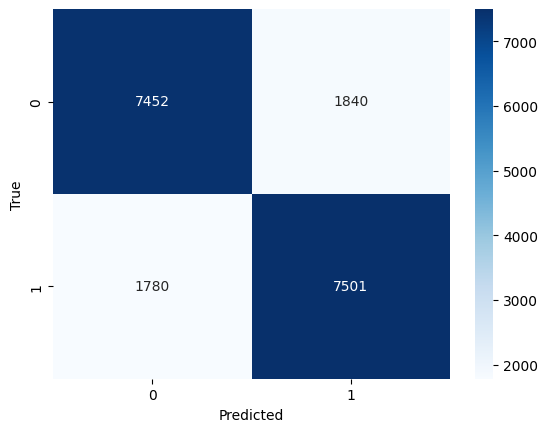

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= arbol_default.predict(x_test)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
# Realizar k-fold cross-validation (por ejemplo, con k=15)

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

scores = cross_val_score(arbol_default, ds_trabajo_x, ds_trabajo_y, cv=15, scoring=scorer_fn)

# Imprimir los resultados de cada fold
print("F1-scores del arbol", scores)
# Imprimir la precisión promedio
print("f1-score promedio:", scores.mean())

F1-scores del arbol [0.81188119 0.81813773 0.80038854 0.80183    0.81510353 0.81205505
 0.8147257  0.8017262  0.8090537  0.80879865 0.83109405 0.80573094
 0.80292326 0.81290633 0.81388621]
f1-score promedio: 0.810682739029647


---
#### A continuación vamos hacer la búsqueda de los mejores hiperparámetros para un arbol de decision tal que mejoren la métrica de f1-score

In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

#Cantidad de combinaciones que quiero porbar
n=150

#Conjunto de parámetros que quiero usar
params_grid = {
               'min_samples_leaf':list(range(2,20)),
               'min_samples_split': list(range(2,30)),
               'ccp_alpha':np.linspace(0,0.05,n),
               #'max_depth':list(range(1,6))
               'max_depth': list(range(1,120)),
               #'min_samples_split': [2, 5, 10],
               #'min_samples_leaf': [1, 2, 4],
               'max_features': ['sqrt', 'log2'],
               'criterion': ['gini', 'entropy'],
               }

#Cantidad de splits para el Cross Validation
folds=35

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier()

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(ds_trabajo_x,ds_trabajo_y);
#random_search.fit(ds_trabajo_x, ds_trabajo_y)


# Obtener la mejor combinación de hiperparámetros
best_params = randomcv.best_params_
print("Mejores hiperparámetros:", best_params)

---
##### Modelo de arbol optimizado aleatoriamente (pero no es el mejor)

Estos hiperparámetros fueron producto de la búsqueda de los mejores hiperparámetros, pero no son los que mejor rinden. Esto es producto de una de las tantas ejecuciones del código anterior

In [ ]:
hiperparámetros = {'min_samples_split': 7,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 112,
 'criterion': 'entropy',
 'ccp_alpha': 0.00033557046979865775}


Entreno dicho modelo

In [ ]:
# Crear el clasificador de árbol de decisión con los parámetros especificados
arbol_2 = DecisionTreeClassifier(**hiperparámetros)

#Entreno el modelo
modelo_arbol_2 = arbol_2.fit(X = ds_trabajo_x, y = ds_trabajo_y)

#Realizamos una predicción sobre el set de hoteles_test
y_pred = modelo_arbol_2.predict(ds_test_x)

#Valores Predichos
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
df_submission = pd.DataFrame({'id': hoteles_test['id'],'is_canceled': y_pred})
df_submission
df_submission.to_csv('/content/drive/MyDrive/Tp_Datos_2023_2°/submission_kaggle_modelo2.csv',index=False)

Evalúo al modelo sobre nuestro dataset de entrenamiento haciendo cross-validation utilizando la métrica del f1-score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Definir la métrica que deseas utilizar para la evaluación, en este caso, F1-Score
scorer_fn = make_scorer(f1_score)

# Realizar k-fold cross-validation (por ejemplo, con k=15)
scores = cross_val_score(modelo_arbol_2, ds_trabajo_x, ds_trabajo_y, cv=15, scoring=scorer_fn)

# Imprimir los resultados de cada fold
print("F1-scores del arbol", scores)
# Imprimir la precisión promedio
print("f1-score promedio:", scores.mean())

F1-scores del arbol [0.77458396 0.76785257 0.75198728 0.75508587 0.78522167 0.77280509
 0.78090452 0.77260409 0.77090549 0.76324745 0.77105263 0.76299046
 0.75213675 0.77114824 0.74138385]
f1-score promedio: 0.7662606612876685


Evalúo el modelo sobre las particiones generadas por train_test_split()

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      9292
           1       0.79      0.78      0.78      9281

    accuracy                           0.79     18573
   macro avg       0.79      0.79      0.79     18573
weighted avg       0.79      0.79      0.79     18573

F1-Score: 0.784262580154331


Text(50.722222222222214, 0.5, 'True')

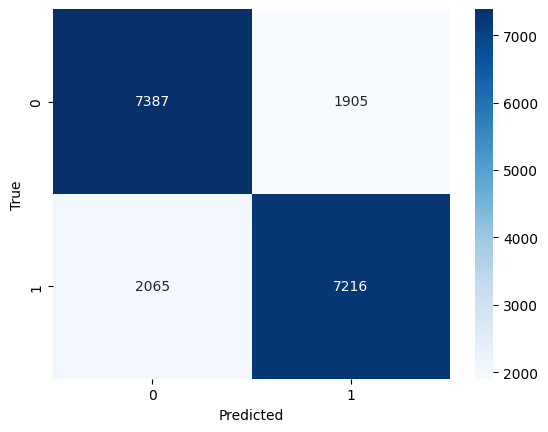

In [ ]:
#Hago predicción sobre el set de evaluacion de train_test_split
y_pred_con_x_test= modelo_arbol_2.predict(x_test)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test,y_pred_con_x_test))
print('F1-Score: {}'.format(f1_score(y_test, y_pred_con_x_test, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred_con_x_test)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

---
##### Mejor modelo


Este código lo ejecutamos varias veces, pero la que mejor combinacion de hiperparámetros que optimizaron el f1-score fue esta combinacion:

Mejores hiperparámetros: {'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 110, 'criterion': 'entropy', 'ccp_alpha': 0.0}

In [ ]:
mejores_hiperparámetros = {
    'min_samples_split': 18,
    'min_samples_leaf': 5,
    'max_features': 'sqrt',
    'max_depth': 110,
    'criterion': 'entropy',
    'ccp_alpha': 0.0
}


###### Entrenamiento del mejor modelo y genero predicciones sobre el dataset modificado de hoteles_test



In [ ]:
# Crear el clasificador de árbol de decisión con los parámetros especificados
clf = DecisionTreeClassifier(**mejores_hiperparámetros)

#Entreno el modelo
best_model = clf.fit(X = ds_trabajo_x, y = ds_trabajo_y)

#Realizamos una predicción sobre el set de hoteles_test
y_pred_3 = best_model.predict(ds_test_x)

#Valores Predichos
y_pred_3

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
len(y_pred)

26535

In [ ]:
df_submission = pd.DataFrame({'id': hoteles_test['id'],'is_canceled': y_pred_3})
df_submission
df_submission.to_csv('/content/drive/MyDrive/Tp_Datos_2023_2°/submission_kaggle_modelo3.csv',index=False)

###### (PUNTO B) Grafico el mejor arbol



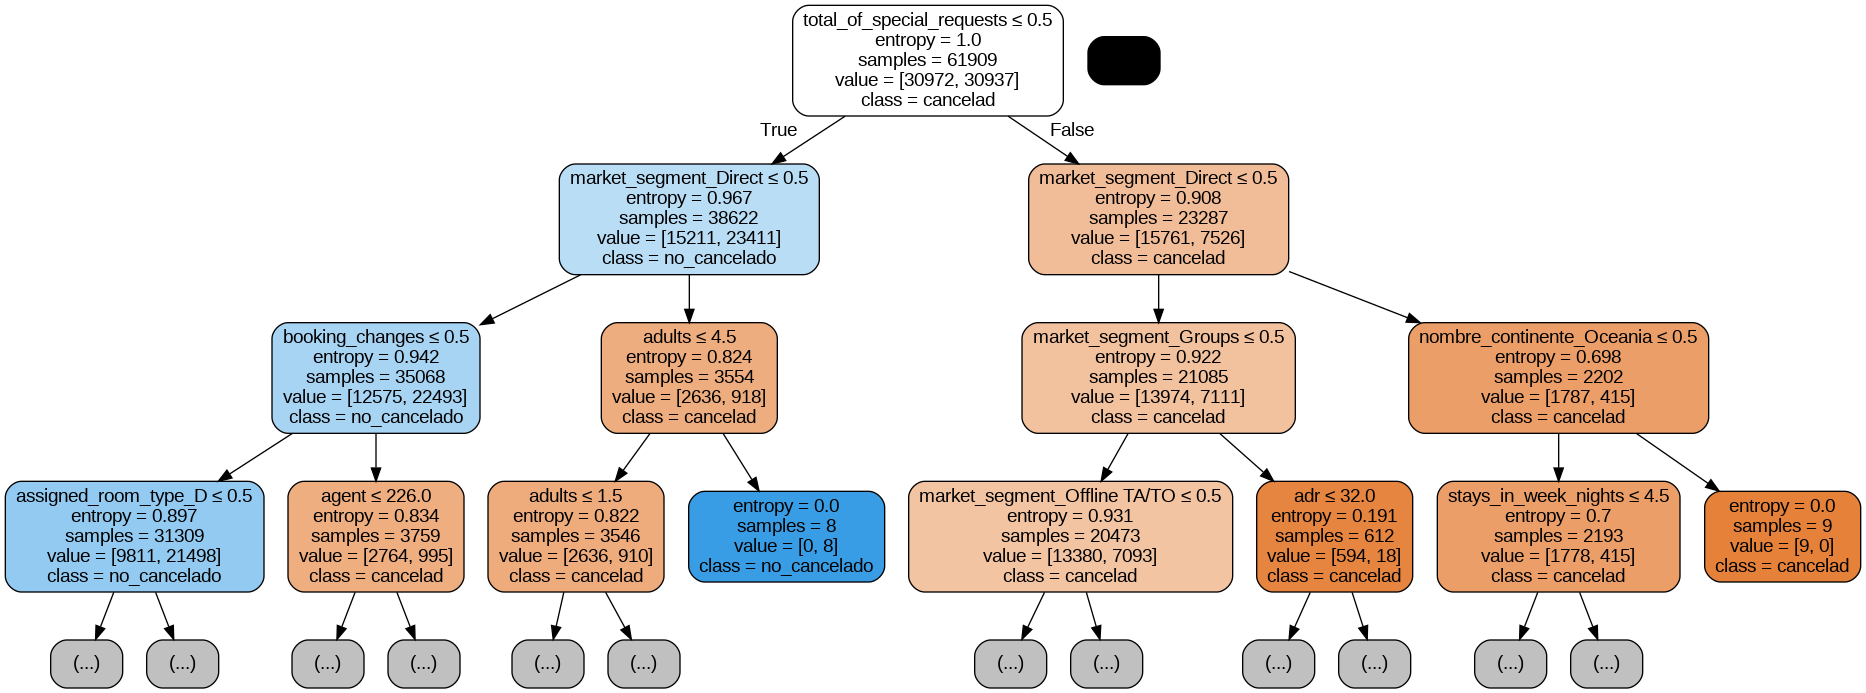

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=ds_trabajo_x.columns,
                class_names=['cancelad','no_cancelado'],
                max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

###### (PUNTO C)
c)  Analizar el arbol de decisión seleccionado describiendo los atributos elegidos, y decisiones evaluadas (explicar las primeras reglas obtenidas)

RTA:

Los atributos más importantes son aquellos que, cuando se utilizan para dividir los nodos del árbol, resultan en una mayor reducción de la impureza (usando Gini en este caso) en las hojas. Esto significa que estos atributos son los más informativos para el modelo y tienen un mayor impacto en las decisiones de clasificación.

También estos atributos son los más relevantes para la optimización del F1-Score, lo que indica su importancia en la capacidad del modelo para realizar clasificaciones precisas.

In [ ]:
feat_imps = best_model.feature_importances_

# Ordena los atributos por importancia en orden descendente
sorted_feats = sorted(range(len(feat_imps)), key=lambda i: feat_imps[i], reverse=True)

# Imprime los top 5 atributos más importantes
print("Top 5 Atributos Más Importantes:")
for i in range(5):
    idx = sorted_feats[i]
    print('{}: {}'.format(ds_trabajo_x.columns[idx], feat_imps[idx]))


Top 5 Atributos Más Importantes:
deposit_type_Non Refund: 0.19965189076999254
lead_time: 0.13553731476619427
required_car_parking_spaces: 0.08948908884497227
previous_cancellations: 0.08370352747957581
arrival_date: 0.04795596198168826


###### (PUNTO D) Evalúo el mejor modelo de arbol de decision:

Acá estoy evaluándolo con haciendo cross validation sobre el dataset de entrenamiento de ds_trabajo_x , y no sobre x_train (que sale de hacer el train_test_split)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Definir la métrica que deseas utilizar para la evaluación, en este caso, F1-Score
scorer_fn = make_scorer(f1_score)

# Realizar k-fold cross-validation (por ejemplo, con k=15)
scores = cross_val_score(best_model, ds_trabajo_x, ds_trabajo_y, cv=15, scoring=scorer_fn)

# Imprimir los resultados de cada fold
print("F1-scores de cada split", scores)
# Imprimir la precisión promedio
print("f1-score promedio:", scores.mean())

F1-scores de cada split [0.79355638 0.79909593 0.80190572 0.79980178 0.80550858 0.7938856
 0.79680878 0.788929   0.7798098  0.79761905 0.79715128 0.78969742
 0.78769387 0.80126953 0.79277049]
f1-score promedio: 0.7950335475253522


Creo la matriz de confusion (utilizando x_test e y_test sacado del train_test_split)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      9292
           1       0.86      0.81      0.83      9281

    accuracy                           0.84     18573
   macro avg       0.84      0.84      0.84     18573
weighted avg       0.84      0.84      0.84     18573

F1-Score: 0.8328068717096149


Text(50.722222222222214, 0.5, 'True')

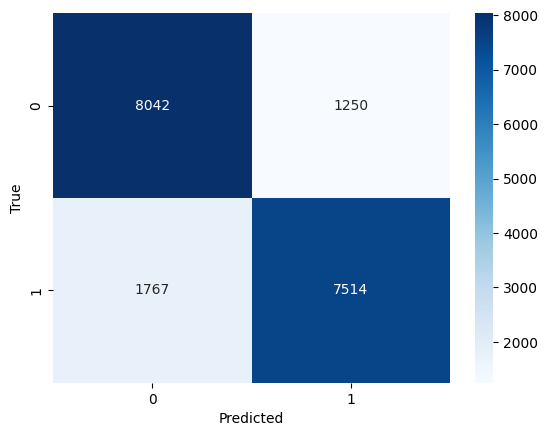

In [ ]:
best_model = clf.fit(X = ds_trabajo_x, y = ds_trabajo_y)
#Hago predicción sobre el set de evaluacion de train_test_split
y_pred_con_x_test= best_model.predict(x_test)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test,y_pred_con_x_test))
print('F1-Score: {}'.format(f1_score(y_test, y_pred_con_x_test, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred_con_x_test)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Podemos ver como claramente el modelo optimizado performó mejor que los anteriores modelos

Explicacion de las métricas obtenidas:

Precision:

1. La precisión es la proporción de predicciones positivas que fueron correctas. Para la clase 0, la precisión es del 0.82, lo que significa que el 82% de las predicciones etiquetadas como clase 0 fueron correctas. Para la clase 1, la precisión es del 0.86, lo que significa que el 86% de las predicciones etiquetadas como clase 1 fueron correctas.

Recall (Exhaustividad o Sensibilidad):

2. El recall mide la proporción de casos positivos reales que se predijeron correctamente. Para la clase 0, el recall es del 0.87, lo que significa que el 87% de los casos reales de clase 0 se predijeron correctamente. Para la clase 1, el recall es del 0.81, lo que significa que el 81% de los casos reales de clase 1 se predijeron correctamente.

F1-Score:

3. El F1-Score es la métrica que combina precisión y recall en una única puntuación. Para ambas clases, el F1-Score es de aproximadamente 0.83. Un F1-Score de 1 sería perfecto, mientras que un valor de 0 sería el peor.

Support:

4. La columna "support" muestra el número de muestras en cada clase en el conjunto de evaluación. En este caso, tenemos 9292 muestras de la clase 0 y 9,281 muestras de la clase 1.

Accuracy (Exactitud):

5. La exactitud mide la proporción total de predicciones correctas en todas las clases. En este caso, la exactitud es del 0.84, lo que significa que el 84% de las predicciones fueron correctas en general.

Macro Average y Weighted Average:

6. "Macro Average" calcula promedios sin tener en cuenta el desequilibrio de clases, y las métricas macro promediadas son aproximadamente 0.84.
"Weighted Average" tiene en cuenta el desequilibrio de clases al ponderar las métricas por el número de muestras en cada clase. En este caso, las métricas ponderadas son aproximadamente 0.84.

In [ ]:
# df_submission = pd.DataFrame({'id': hoteles_test['id'],'is_canceled': y_pred})
# df_submission
# df_submission.to_csv('/content/drive/MyDrive/Tp_Datos_2023_2°/submission_kaggle_gaston_1.csv',index=False)